<a href="https://colab.research.google.com/github/mihirkumar28/LP-3/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem** : 
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data


    Number of Hours: 10,9,2,15,10,16,11,16 

    Backpain Risk Score: 95,80,10,50,45,98,38,93

#**Perception** 


*   Let X be the set of number of hours driven and Y be the set of back pain risk score such that Xi is the ith element in set X and similar for Y.


    X={10,9,2,15,10,16,11,16}, 1 ≤ X ≤ 24, X ∈ ℚ        
    Y={95,80,10,50,45,98,38,93}, 0 ≤ Y ≤ 100, Y ∈ ℚ

*   There exits one-to-many mapping that is the mapping fuction is **surjective**. X1 and X5 map to the same value that is X1=X5=10 but Y1 is not equal to Y5 that is

    **f:X→Y**,
    
    **∀y ∈ Y, ∃x ∈ X, f(x)=y**    

#**Cognition**

*   As **X ∈ ℚ** & **Y ∈ ℚ**, make use of regression.

*   Machine Learning is used as it can suitably map such one to many mapping from X to Y.









The domain here is the set of hours driven and the range is the risk score of contracting acute back pain. The task is to find a function which maps the domain to range. 

##**Bloom's Taxonomy (Analyze)**

In [ ]:
import pandas as pd
df=pd.DataFrame({'Hours Driven':[10,9,2,15,10,16,11,16],'Backpain Risk':[95,80,10,50,45,98,38,93]})
corr_matrix=df.corr(method='pearson')
print('Pearson Correlation for Hours diven and Backpain risk is {0:.2f}'.format(corr_matrix['Hours Driven']['Backpain Risk']))

Pearson Correlation for Hours diven and Backpain risk is 0.66


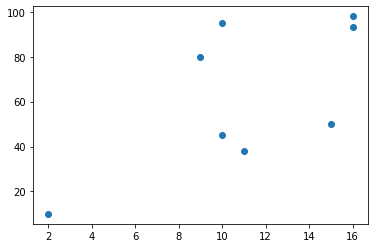

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([10,9,2,15,10,16,11,16],[95,80,10,50,45,98,38,93])

It has been cognised that regression would be used. Given the high value of Pearson Correlation Coeffecient, **Linear Regression** will be used for mapping of domain to range.

The approach is to find a suitable function which allows mapping from domain to range that is the function will be of the form **y=mx+c** and the model will predict the coeffecients **m** and **c**. Initial observation of dataset shows that input values are labelled that is target label is available although such a labelling is not one-to-one. Thus, **supervised learning** is used.

##**Bloom's Taxonomy(Create)**

One way to overcome this one-to-many mapping is to introduce another feature. It is clear that there is atleast one other feature involved to suitably map independent feature to dependent variable. 

On the basis of the following paper: https://www.researchgate.net/publication/316896904_Low_back_pain_among_drivers_A_cross-sectional_study

Another feature **Weekly_Hours** is introduced, as there is a clear direct relation between the back pain and weekly working hours.

    Number of Hours Driven, X1={10,9,2,15,10,16,11,16}

    Weekly_Hours, X2={56,47,24,35,25,52,22,50}, 0 ≤ X2 ≤ 70, X2 ∈ ℚ         

    Backpain Risk Score, Y={95,80,10,50,45,98,38,93}

For the given probelm,
    
**System={ st, ed, X, Y, DD, NDD, fmain, ff }**

    st={(x1,x2,y)| 1 ≤ x1 ≤ 24, 1 ≤ x2 ≤ 70, 1 ≤ y ≤ 24, x1,x2,y ∈ ℚ}

    ed={(coeff), (y_pred), r2_score | 0 ≤ y_pred ≤ 100, 0 ≤ r2_score ≤ 1, coeff,y_pred,r2_score ∈ ℚ}

    X={x1,x2,y}
        x1:number of hours driven
        x2:weekly working hours
        y:backpain risk score

    Y={coeff,y_pred,r2_score}
      coeff: coeffecients of line
      y_pred: predictions made by functions
      r2_score: scalar to evaluate the correctness of our model

    DD={x1,y}
      x1:number of hours driven
      y:backpain risk score

    NDD={x2}
      x2:weekly working hours


    fmain=main function which converts start state to end state

    ff=friend functions which assist main function

Now we will clearly define our Programmer's Perspective

    st=Start state=constructor of class

    e=end state=predict_output() function of class

    X=set of input={hours(X1),weekly_hours(X2),risk_score(Y)}

    Y_hat=set of outputs={set of coefficents{B1,B2,C},Y_prediction ,r2_score )

    fmain=where main logic is implemented=predict_main()

    ff=set of friend function={calculate_coef(),predict() ,r2_score() }

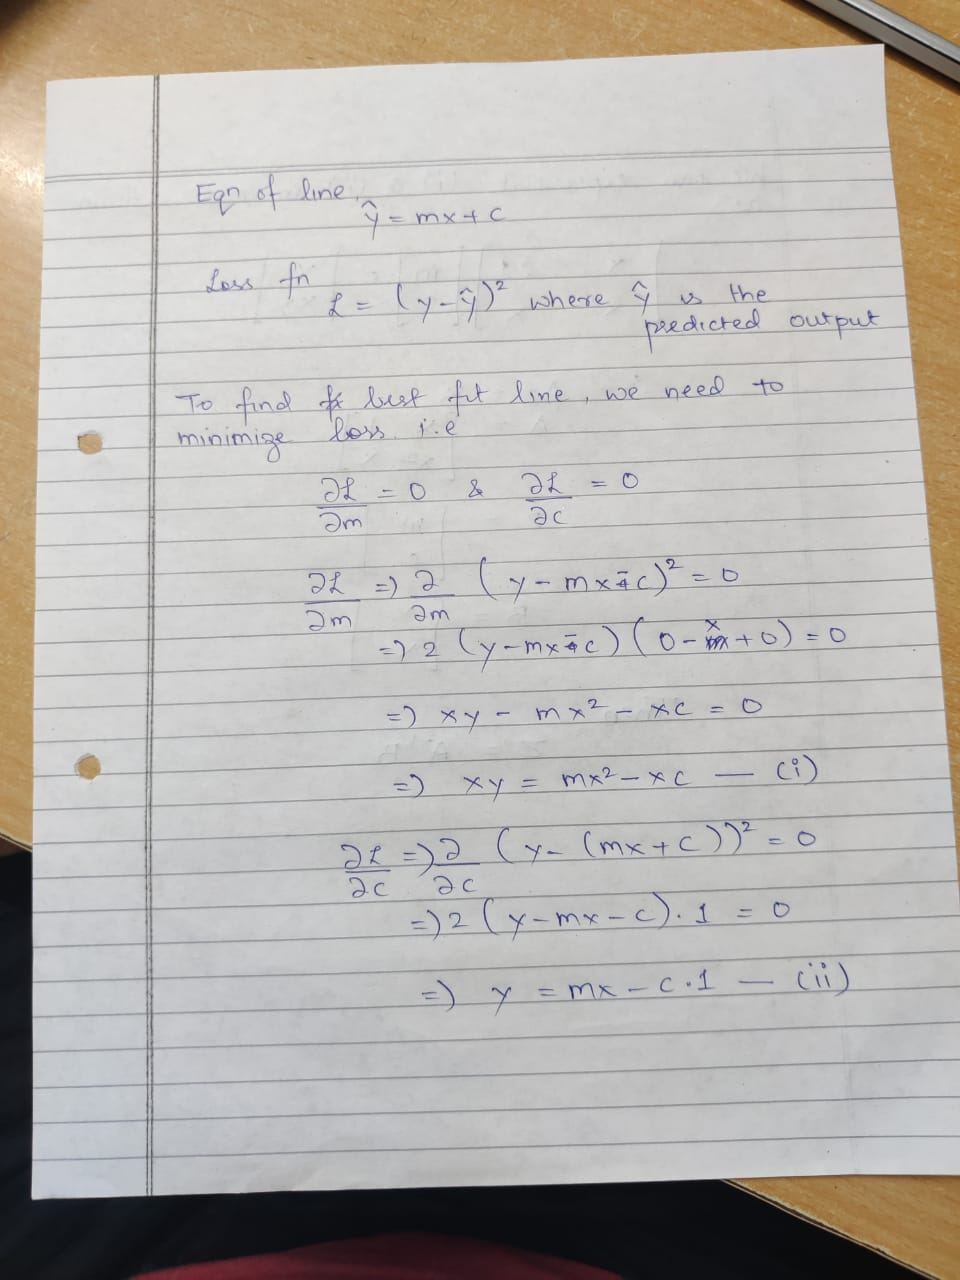

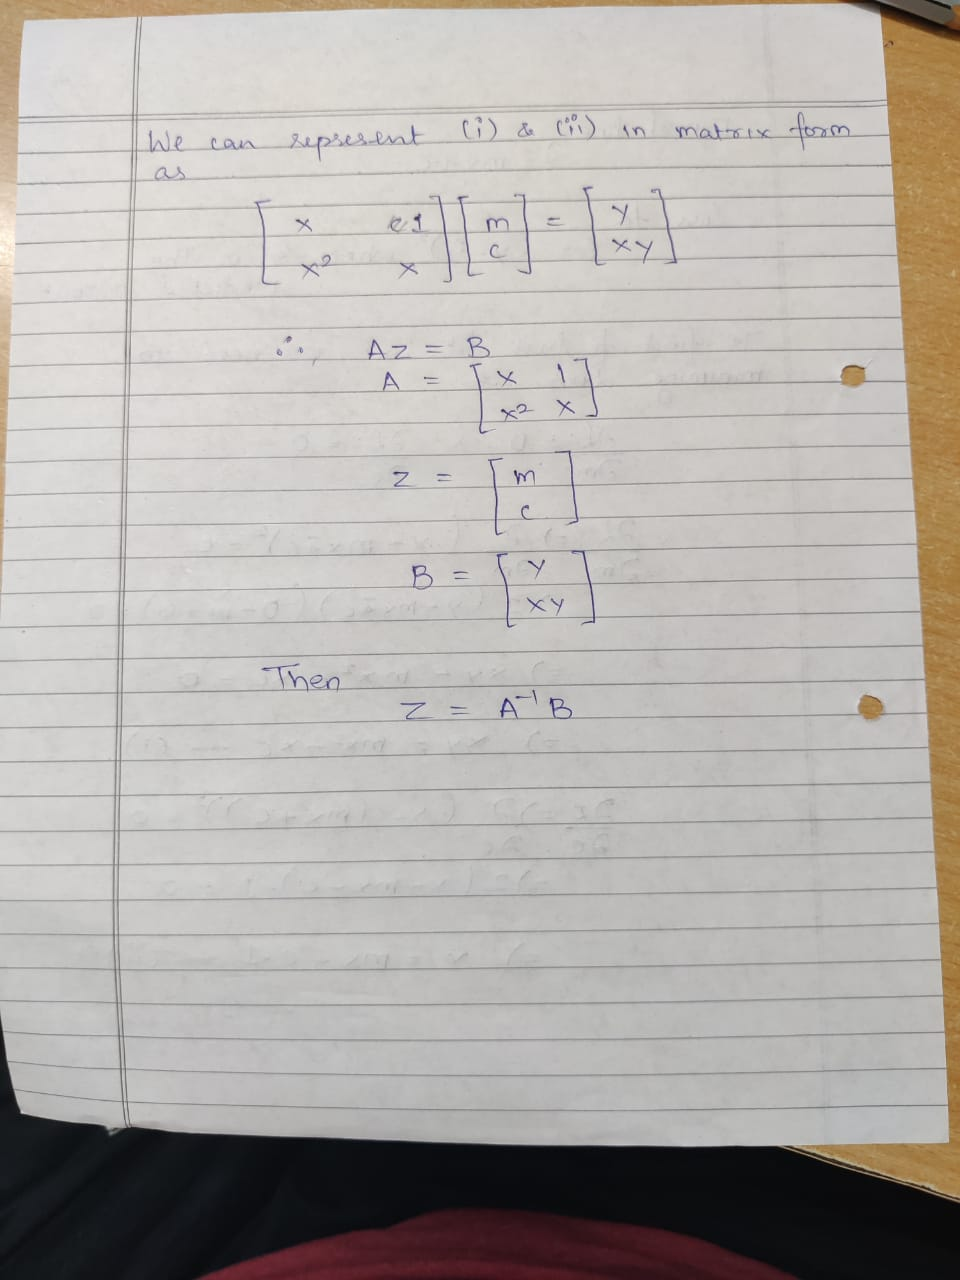

##**Bloom's Taxonomy (Remembering)**

In [13]:
import numpy as np
import sklearn.metrics as sm
import concurrent.futures

class S:
  def __init__(self,hours,weekly_hours,risk_score):
    self.hours=hours
    self.weekly_hours=weekly_hours
    self.risk_score=risk_score
    self.total_sample=len(self.hours)
    with concurrent.futures.ThreadPoolExecutor() as executor:
      t1=executor.submit(self.initialize_X)
      t2=executor.submit(self.initialize_Y)
      self.X=t1.result()
      self.Y=t2.result()
  def initialize_X(self):
    self.X=np.zeros((self.total_sample,3))
    for i in range(self.total_sample):
      self.X[i]=[1,hours_driven[i],weekly_hours[i]]
    return self.X
    
  def initialize_Y(self):
    self.Y=np.array([[]])
    for i in range(self.total_sample):
      self.Y=np.append(self.Y,risk_score[i])
    return self.Y.reshape(self.total_sample,1)
 

##**Bloom's Taxonomy(Apply)**

In [9]:
def cal_coef(self):
  X_transpose=self.X.T
  X_squared=X_transpose.dot(self.X)
  X_inv=np.linalg.inv(X_squared)
  beta=X_inv.dot(X_transpose).dot(self.Y)
  return beta
    
def predict(self,beta):
  return np.dot(self.X,beta)
    
    
def predict_main(self):
  beta=self.cal_coef()
  pred=self.predict(beta)
  R2_score = round(sm.r2_score(self.risk_score, pred), 2)
  return beta,pred,R2_score

##**Bloom's Taxonomy(Evaluate)**

In [14]:
hours_driven=[10,9,2,15,10,16,11,16]
weekly_hours=[56,47,24,35,25,52,22,50]
risk_score=[95,80,10,50,45,98,38,93]

model=S(hours_driven,weekly_hours,risk_score)

coeffecients,Y_predictions,coeff_corr=model.predict_main()

print('Equation of line is backpain={0:+.2f}{1:+.2f}*hours{2:+.2f}*weekly_hours'.format(coeffecients[0][0],coeffecients[1][0],coeffecients[2][0]))
print('Square of correlation coeffecient is {0:.2f}'.format(coeff_corr))

Equation of line is backpain=-30.43+1.88*hours+1.88*weekly_hours
Square of correlation coeffecient is 0.94
